In [88]:
%matplotlib inline
# import naming conventions 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Part 2

In [89]:
gnacs_x = "id|postedTime|body|None|['twitter_entiteis:urls:url']|['None']|['actor:languages_list-items']|gnip:language:value|twitter_lang|[u'geo:coordinates_list-items']|geo:type|None|None|None|None|actor:utcOffset|None|None|None|None|None|None|None|None|None|actor:displayName|actor:preferredUsername|actor:id|gnip:klout_score|actor:followersCount|actor:friendsCount|actor:listedCount|actor:statusesCount|Tweet|None|None|None"
colnames = gnacs_x.split('|')

In [90]:
# prevent the automatic compression of wide dataframes (add scroll bar)
pd.set_option("display.max_columns", None)

# get some data, inspect
df1 = pd.read_csv('.# n.b.: this is an *in-place* delete -- unusual for a pandas structure
print df1.columns
print df1.drop( [u'None.5', u'None.6', u'None.7', u'None.8', u'None.9', u'None.10',
       u'None.11', u'None.12', u'None.13'],axis=1).columns/data/twitter_sample.csv', sep='|', names=colnames)

df1.tail(7)

SyntaxError: EOL while scanning string literal (<ipython-input-90-5a6b8a56d2a9>, line 5)

In [ ]:
# n.b.: this is an *in-place* delete -- unusual for a pandas structure
print df1.columns
print df1.drop( [u'None.5', u'None.6', u'None.7', u'None.8', u'None.9', u'None.10',
       u'None.11', u'None.12', u'None.13'],axis=1).columns

In [ ]:
# have a peek
df1.tail(2)

# Slicing and Combining

In [ ]:
# inspect those rows with twitter-classified lang 'en' (scroll the right to see)
df1[df1.twitter_lang == 'fr'].head()

# the colons in the column name below won't allow dot-access to the column, so we can quote them and still filter.
#df1[df1["gnip:language:value"] == 'en'].head()  

In [ ]:
# create new dataframe from numerical columns
df2 = df1[["gnip:klout_score","actor:displayName", "actor:friendsCount", "actor:listedCount"]]

df2.head()

In [ ]:
df2.dtypes

In [ ]:
# convert ints / strings to floats, give up on anything else (call it 0.0)
def floatify(val):
    if val == None or val == 'None':
        return 0.0
    else:
        return float(val)

In [ ]:
# assigning to an existing column overwrites that column 
df2['gnip:klout_score'] = df2['gnip:klout_score'].map(floatify)

# check again
df2.dtypes

In [93]:
# use all floats just for fun. 
#not sure why its not working.. come back to it
df2 = df2.astype(float)

df2.dtypes

ValueError: could not convert string to float: Lindsey Chamberlain

In [92]:
# look at some activity ratios - add col to df
df2['fol/fr'] = df2['gnip:klout_score'] / df2['actor:friendsCount']

df2.head()

# can also use the built-in describe() method to get quick descriptive stats on the dataframe
#df2.describe()

C:\Users\Jaynie\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,gnip:klout_score,actor:displayName,actor:friendsCount,actor:listedCount,fol/fr
0,35.0,Rümeysa Özdemir,129,0,0.271318
1,32.0,cori▲alex.,215,0,0.148837
2,18.0,黒い恋人,54,0,0.333333
3,50.0,MARIA,174,1,0.287356
4,21.0,Элька Алб,6,0,3.500000


# Grouping

In [94]:
df1.head()

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
0,"tag:search.twitter.com,2005:351835317671690241",2013-07-01T22:50:51.000Z,kavga edelim ama konuşalım,None,None,None,['tr'],en,tr,None,None,"['[25.663883, 35.817497]', '[25.663883, 42.109...",Polygon,Türkiye,TR,7200,None,None,None,None,None,None,None,None,None,Rümeysa Özdemir,uykugibisiyok,248312738,35,178,129,0,2028,Tweet,None,None,None
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,None,None,['en'],en,es,"[47.29088246, -101.0379045]",Point,"['[-101.043785, 47.275933]', '[-101.043785, 47...",Polygon,"Washburn, ND",US,-21600,sevenohone,None,None,None,None,None,None,None,None,cori▲alex.,CoBerg_,48025164,32,144,215,0,4071,Reply,http://twitter.com/shane_joersz/statuses/35182...,None,None
2,"tag:search.twitter.com,2005:351835317747191808",2013-07-01T22:50:51.000Z,お前との肌のふれあいなんぞ求めてない。自重しろ。,None,None,None,['ja'],en,ja,"[35.70675048, 139.84273005]",Point,"['[139.8332175, 35.6345694444444]', '[139.8332...",Polygon,"江戸川区, 東京都",JP,-36000,ちば,None,None,None,None,None,None,None,None,黒い恋人,yamasyoyamasyo,217987801,18,37,54,0,3505,Tweet,None,None,None
3,"tag:search.twitter.com,2005:351835317608792064",2013-07-01T22:50:51.000Z,@Gabo_navoficial yo tambien creo en ti mi char...,None,None,None,['en'],en,es,None,None,"['[-80.248663, 25.986366]', '[-80.248663, 26.0...",Polygon,"Hollywood, FL",US,-14400,hollywood florida,None,None,None,None,None,None,None,None,MARIA,maria_e_pena,461188787,50,438,174,1,17636,Reply,http://twitter.com/Gabo_navoficial/statuses/35...,None,None
4,"tag:search.twitter.com,2005:351835317755592705",2013-07-01T22:50:51.000Z,только ты об этом не знаешь... http://t.co/MOH...,['http://twitter.com/ElkaAlb/status/3518353177...,None,None,['ru'],en,ru,None,None,"['[23.179216999999998, 51.2626423]', '[23.1792...",Polygon,Belarus,BY,None,None,None,None,None,None,None,None,None,None,Элька Алб,ElkaAlb,1433828712,21,12,6,0,145,Tweet,None,None,None


In [95]:
pop_df = df1[df1["actor:friendsCount"] >= 100]

In [101]:
lang_gb = pop_df[['twitter_lang',\
             'gnip:klout_score',\
             'actor:followersCount',\
             'actor:friendsCount',\
             'actor:listedCount']].groupby('twitter_lang')

lang_gb.head(2)  

,twitter_lang,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount
0,tr,35,178,129,0
1,es,32,144,215,0
3,es,50,438,174,1
5,tr,41,226,346,0
8,en,38,380,860,0
9,en,41,160,135,0
16,und,53,1179,628,8
18,he,37,151,284,0
20,it,46,1999,293,27
22,id,43,258,302,0


In [102]:
lang_gb_mean = lang_gb.aggregate(np.mean)  

lang_gb_mean.head()

,actor:followersCount,actor:friendsCount,actor:listedCount
twitter_lang,,,
ar,458.000000,413.000000,0.000000
en,1843.424242,602.393939,17.272727
es,516.642857,446.214286,2.357143
fr,116.000000,122.000000,0.000000
he,151.000000,284.000000,0.000000


# Plotting

2. Three graphs from each of the last 3 sections using seaborn:

- Visualizing the distribution of a dataset

- Plotting univariate distributions

- Plotting bivariate distributions

- Visualizing pairwise relationships in a dataset

- Visualizing linear relationships

- Plotting with categorical data

In [103]:
%matplotlib inline

In [104]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [105]:
import seaborn as sns
sns.set(color_codes=True)

In [107]:
np.random.seed(sum(map(ord, "distributions")))

# Plotting univariate distributions

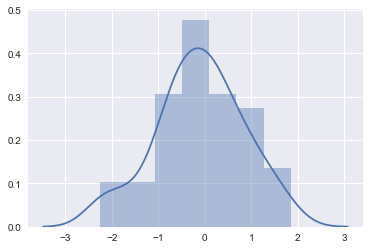

In [110]:
A = np.random.normal(size=50)
sns.distplot(A);

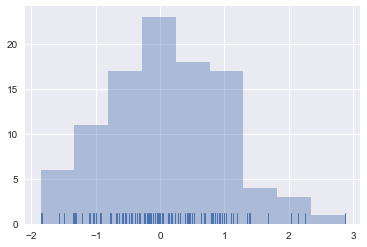

In [111]:
sns.distplot(x, kde=False, rug=True);

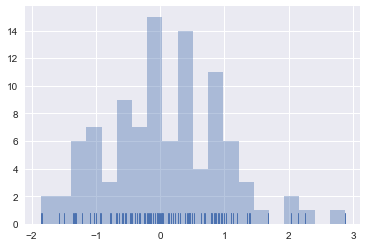

In [112]:
sns.distplot(x, bins=20, kde=False, rug=True);

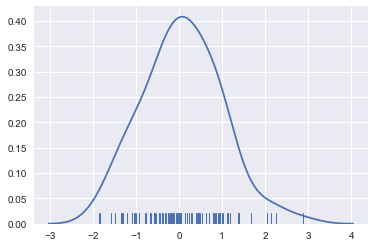

In [113]:
sns.distplot(x, hist=False, rug=True);

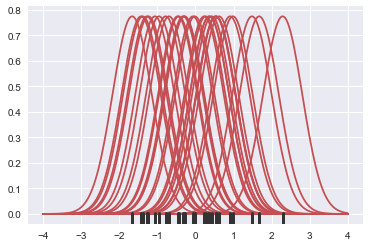

In [114]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

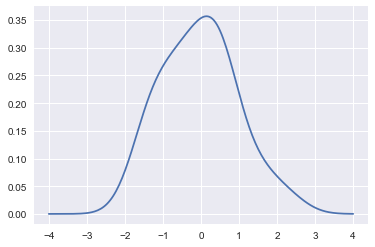

In [115]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);


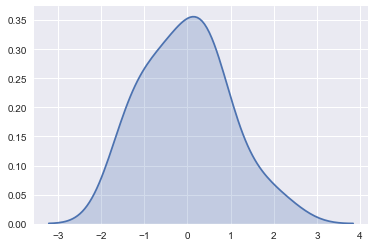

In [116]:
sns.kdeplot(x, shade=True);

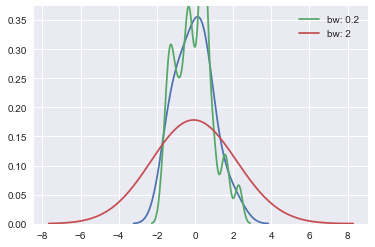

In [117]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

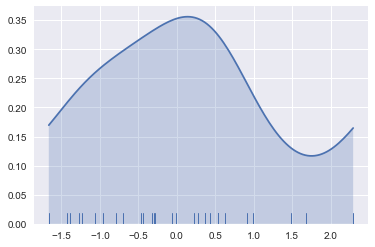

In [118]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

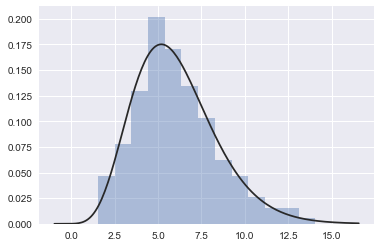

In [119]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

# Plotting bivariate distributions

In [120]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

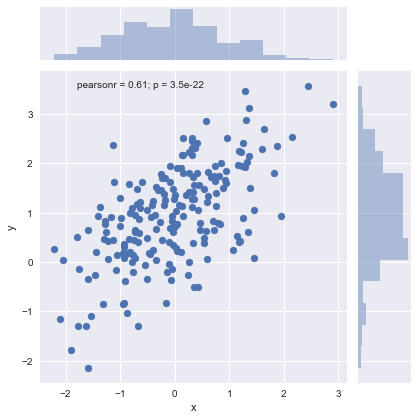

In [121]:
sns.jointplot(x="x", y="y", data=df);

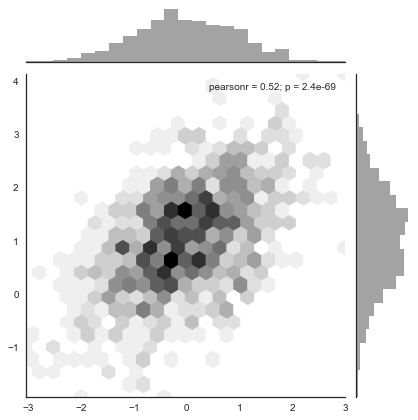

In [122]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

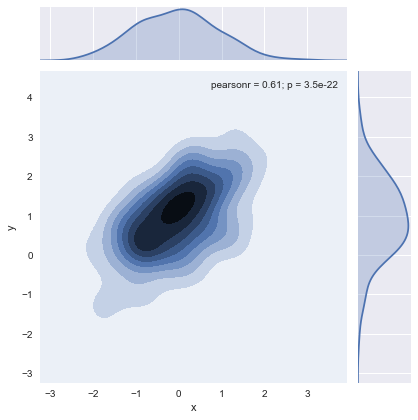

In [123]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

# Visualizing pairwise relationships in a dataset

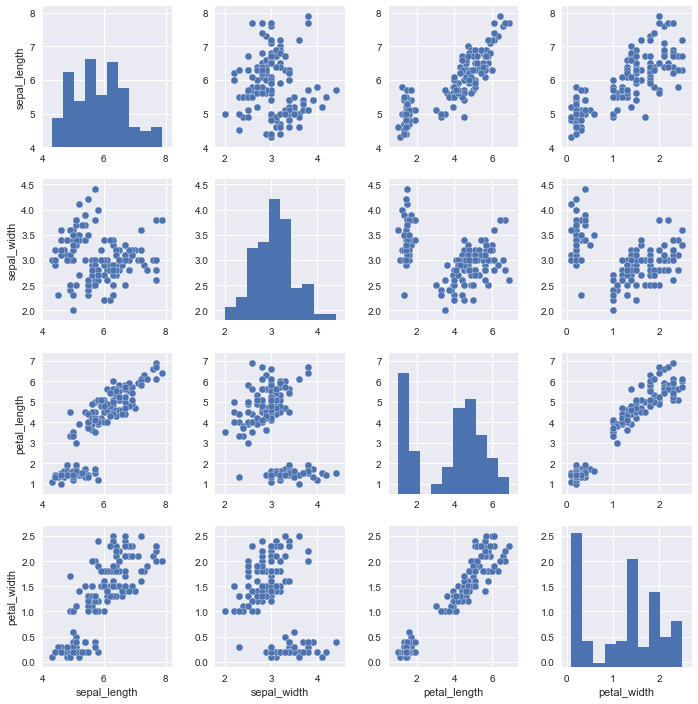

In [124]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

C:\Users\Jaynie\Anaconda2\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


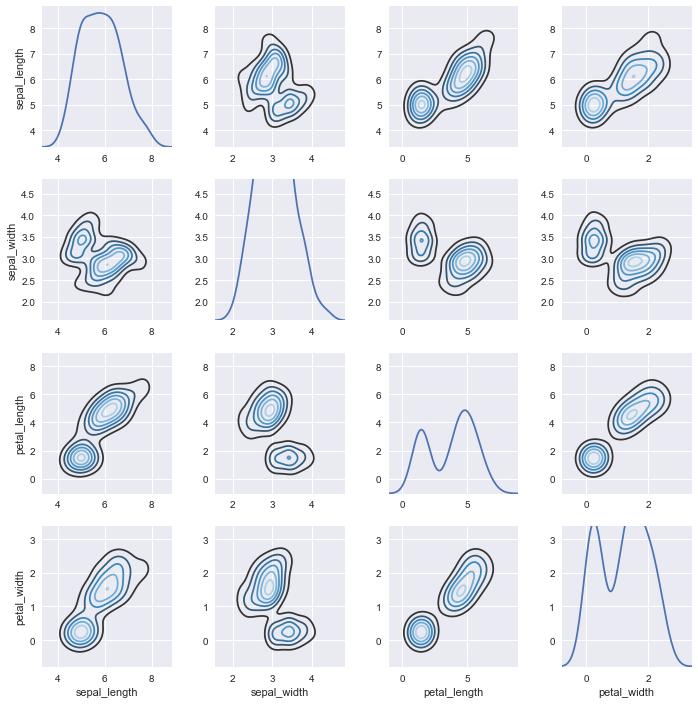

In [125]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

# Visualizing linear relationships


In [127]:
%matplotlib inline

In [128]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [129]:
import seaborn as sns
sns.set(color_codes=True)

In [130]:
np.random.seed(sum(map(ord, "regression")))

In [131]:
tips = sns.load_dataset("tips")

# Plotting with categorical data


In [133]:
%matplotlib inline

In [134]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [135]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [136]:
np.random.seed(sum(map(ord, "categorical")))

In [137]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

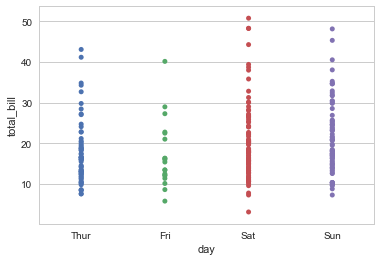

In [138]:
sns.stripplot(x="day", y="total_bill", data=tips);

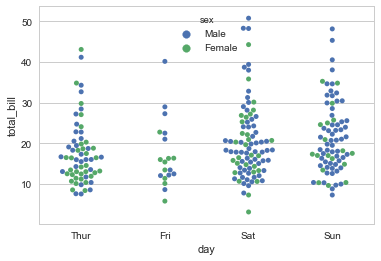

In [139]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

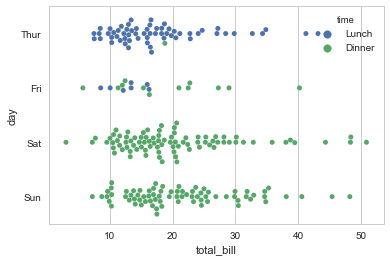

In [140]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips);